<a href="https://colab.research.google.com/github/DimasNDP/PCVK_Genap_2021/blob/master/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import os
import glob

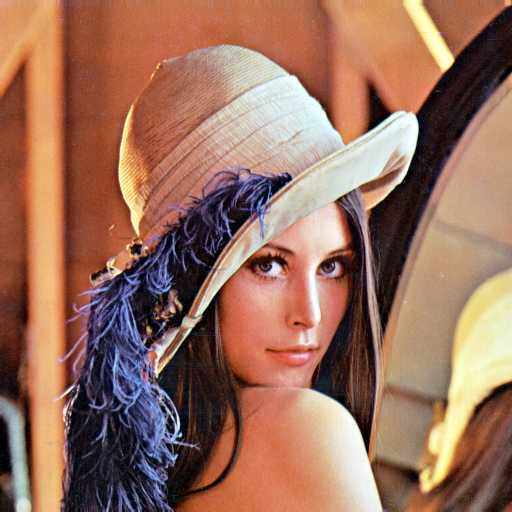

<BarContainer object of 256 artists>

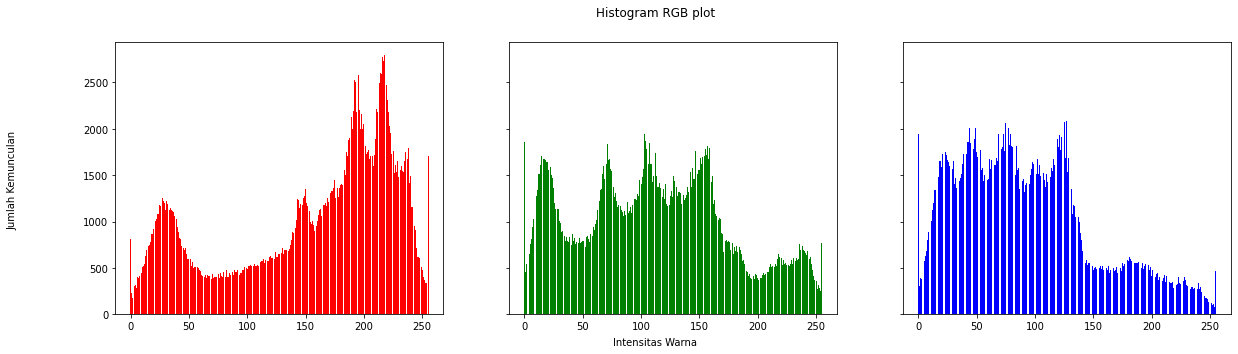

In [20]:
#Tugas Praktikum No 3

img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg',cv.IMREAD_COLOR)
cv2_imshow(img)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

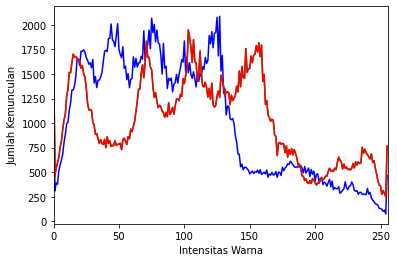

In [21]:
#Tugas Praktikum No 4

colors = ("b", "g", "r")
channel_ids = (0, 1, 1)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

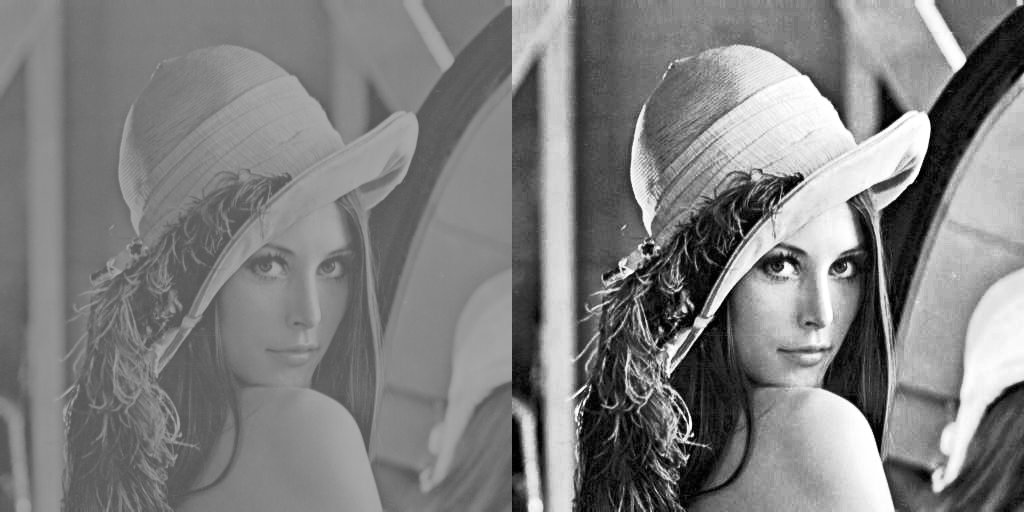

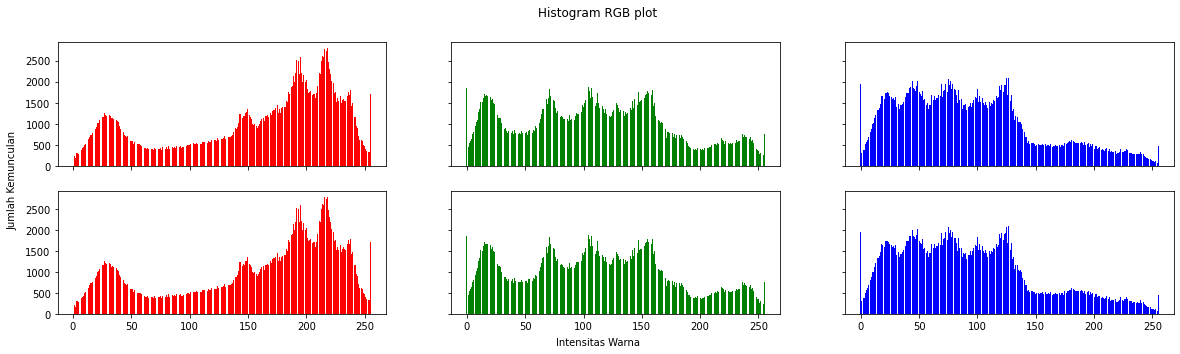

In [27]:
#Tugas Praktikum No 5

img = cv.imread('/content/drive/MyDrive/PCVK/lena_gs_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

In [ ]:
#Tugas Praktikum No 6


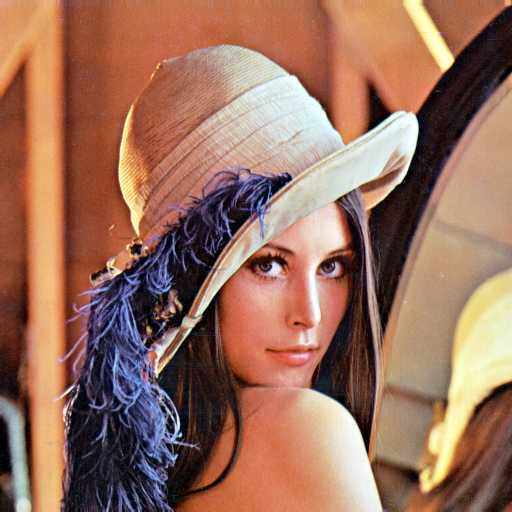

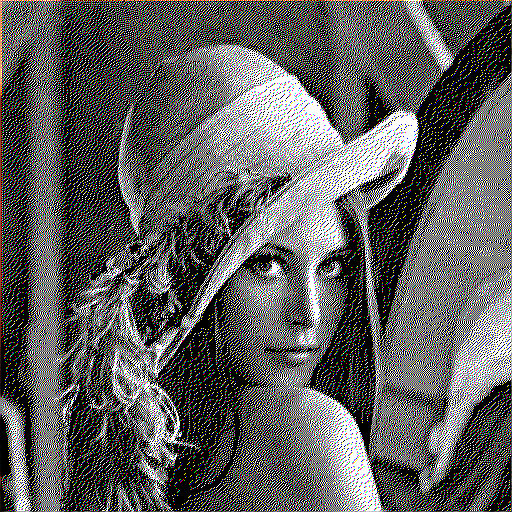

True

In [24]:
#Tugas Praktikum No 8

img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
cv2_imshow(img)

for y in range(0, img.shape[0]-1):
  for x in range(1, img.shape[1]-1):
    old_b = img[y, x, 0]
    old_g = img[y, x, 1]
    old_r = img[y, x, 2]
    samplingF = 1
    new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
    new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
    new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)

    img[y, x, 0] = new_b
    img[y, x, 1] = new_g
    img[y, x, 2] = new_r
    quant_error_b = old_b - new_b
    quant_error_g = old_g - new_g
    quant_error_r = old_r - new_r

    img[y, x+1, 0] = np.clip(img[y, x+1, 0] + quant_error_b * 7 / 16.0, 0, 255)
    img[y, x+1, 1] = np.clip(img[y, x+1, 1] + quant_error_g * 7 / 16.0, 0, 255)
    img[y, x+1, 2] = np.clip(img[y, x+1, 2] + quant_error_r * 7 / 16.0, 0, 255)

    img[y+1, x+1, 0] = np.clip(img[y+1, x+1, 0] + quant_error_b * 3 / 16.0, 0, 255)
    img[y+1, x+1, 1] = np.clip(img[y+1, x+1, 1] + quant_error_g * 3 / 16.0, 0, 255)
    img[y+1, x+1, 2] = np.clip(img[y+1, x+1, 2] + quant_error_r * 3 / 16.0, 0, 255)

    img[y+1, x, 0] = np.clip(img[y+1, x, 0] + quant_error_b * 5 / 16.0, 0, 255)
    img[y+1, x, 1] = np.clip(img[y+1, x, 1] + quant_error_g * 5 / 16.0, 0, 255)
    img[y+1, x, 2] = np.clip(img[y+1, x, 2] + quant_error_r * 5 / 16.0, 0, 255)

    img[y+1, x+1, 0] = np.clip(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0, 0, 255)
    img[y+1, x+1, 1] = np.clip(img[y+1, x+1, 0] + quant_error_g * 1 / 16.0, 0, 255)
    img[y+1, x+1, 2] = np.clip(img[y+1, x+1, 0] + quant_error_r * 1 / 16.0, 0, 255)
cv2_imshow(img)
cv.imwrite('/content/drive/MyDrive/PCVK/testlena.jpg', img)